   **Uncovering Weather Trends: A Comprehensive EDA on
             Worldwide Climate Data**
The dataset was chosen due to its relevance to global challenges like climate change and its impact on agriculture, public health, and urban planning. It offers rich data on temperature, humidity, wind speed, and air quality, allowing for detailed univariate and bivariate analyses to uncover key weather patterns. This analysis provides a valuable learning opportunity in data preprocessing and EDA, while contributing to timely discussions on climate adaptation and mitigation strategies.

**Dataset Overview**

Dataset Name: Uncovering Weather Trends: A Comprehensive EDA on Worldwide Climate Data

Key Features:

  
  1.Country: Represents the country of the weather observation.
Location Name: Specific location of the observation.
Temperature (Celsius): Recorded temperature.
Humidity: Humidity levels.
Wind Speed (mph): Wind speed during the observation.
Precipitation (mm): Rainfall measured.
UV Index: UV radiation level.
Air Quality (PM2.5): Level of particulate matter in the air.
Sunrise/Sunset: Time of sunrise and sunset.

2. Preprocessing Steps
Handling Missing Values:
Filled missing values in temperature_celsius, wind_mph, and uv_index with their respective mean values.
Removing Duplicates:
Identified and removed 1 duplicate record from the dataset.
Data Type Conversion:
Converted time-related columns (sunrise, sunset) to datetime format to facilitate time-based analysis.

3. Univariate Analysis
Visualization:
Created box plots for numerical columns to identify outliers and distributions.
Insights:
Temperature and air quality showed some outliers, which may need further investigation.

4. Bivariate Analysis
Scatter Plots:
Analyzed relationships between:
Temperature vs. Humidity: Identified a positive correlation, suggesting warmer temperatures are associated with higher humidity levels.
Temperature vs. Air Quality: Found a negative correlation, indicating poorer air quality with rising temperatures.
Wind Speed vs. Temperature: Showed no significant correlation.
UV Index vs. Temperature: Suggested a positive correlation, indicating that higher temperatures are associated with higher UV levels.
Correlation Heatmap:
Presented the correlation coefficients among numerical variables:
Strong positive and negative correlations were highlighted, aiding in understanding variable relationships.
Conclusion
Through this exploratory data analysis, you have gained insights into weather patterns and relationships within the dataset. This analysis can inform further research or decision-making processes regarding climate trends and their implications.









In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Globalweather.csv')

In [ ]:
print(df.head(5))

       country     location_name        timezone  temperature_celsius  \
0  Afghanistan             Kabul      Asia/Kabul                 26.6   
1      Albania            Tirana   Europe/Tirane                 19.0   
2      Algeria           Algiers  Africa/Algiers                 23.0   
3      Andorra  Andorra La Vella  Europe/Andorra                  6.3   
4       Angola            Luanda   Africa/Luanda                 26.0   

   wind_mph  precip_mm  humidity  uv_index  air_quality_PM2.5  sunrise  \
0       8.3        0.0        24       7.0                8.4  4:50 AM   
1       6.9        0.1        94       5.0                1.1  5:21 AM   
2       9.4        0.0        29       5.0               10.4  5:40 AM   
3       7.4        0.3        61       2.0                0.7  6:31 AM   
4       8.1        0.0        89       8.0              183.4  6:12 AM   

    sunset  
0  6:50 PM  
1  7:54 PM  
2  7:50 PM  
3  9:11 PM  
4  5:55 PM  


In [ ]:
missing_values=df.isnull().sum()


In [ ]:
print(missing_values[missing_values > 0])

temperature_celsius    1
wind_mph               1
uv_index               2
dtype: int64


In [ ]:
df['temperature_celsius'].fillna(df['temperature_celsius'].mean(),inplace=True)
df['uv_index'].fillna(df['uv_index'].mean(),inplace=True)
df['wind_mph'].fillna(df['wind_mph'].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9664\1683933534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temperature_celsius'].fillna(df['temperature_celsius'].mean(),inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9664\1683933534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [ ]:
duplicate_count=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1


In [ ]:
df=df.drop_duplicates()

In [ ]:
data_types=df.dtypes
data_types

country                 object
location_name           object
timezone                object
temperature_celsius    float64
wind_mph               float64
precip_mm              float64
humidity                 int64
uv_index               float64
air_quality_PM2.5      float64
sunrise                 object
sunset                  object
dtype: object

In [ ]:
df['sunrise']=pd.to_datetime(df['sunrise'],errors='coerce')
df['sunset']=pd.to_datetime(df['sunset'],errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_9664\758858838.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise']=pd.to_datetime(df['sunrise'],errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_9664\758858838.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset']=pd.to_datetime(df['sunset'],errors='coerce')


In [ ]:
from scipy import stats
import numpy as np

# Calculate the Z-scores
z_scores = np.abs(stats.zscore(df[['temperature_celsius', 'wind_mph', 'humidity', 'uv_index', 'air_quality_PM2.5']]))

# Identify outliers
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
temperature_celsius    163
wind_mph                 8
humidity                 0
uv_index                12
air_quality_PM2.5      273
dtype: int64


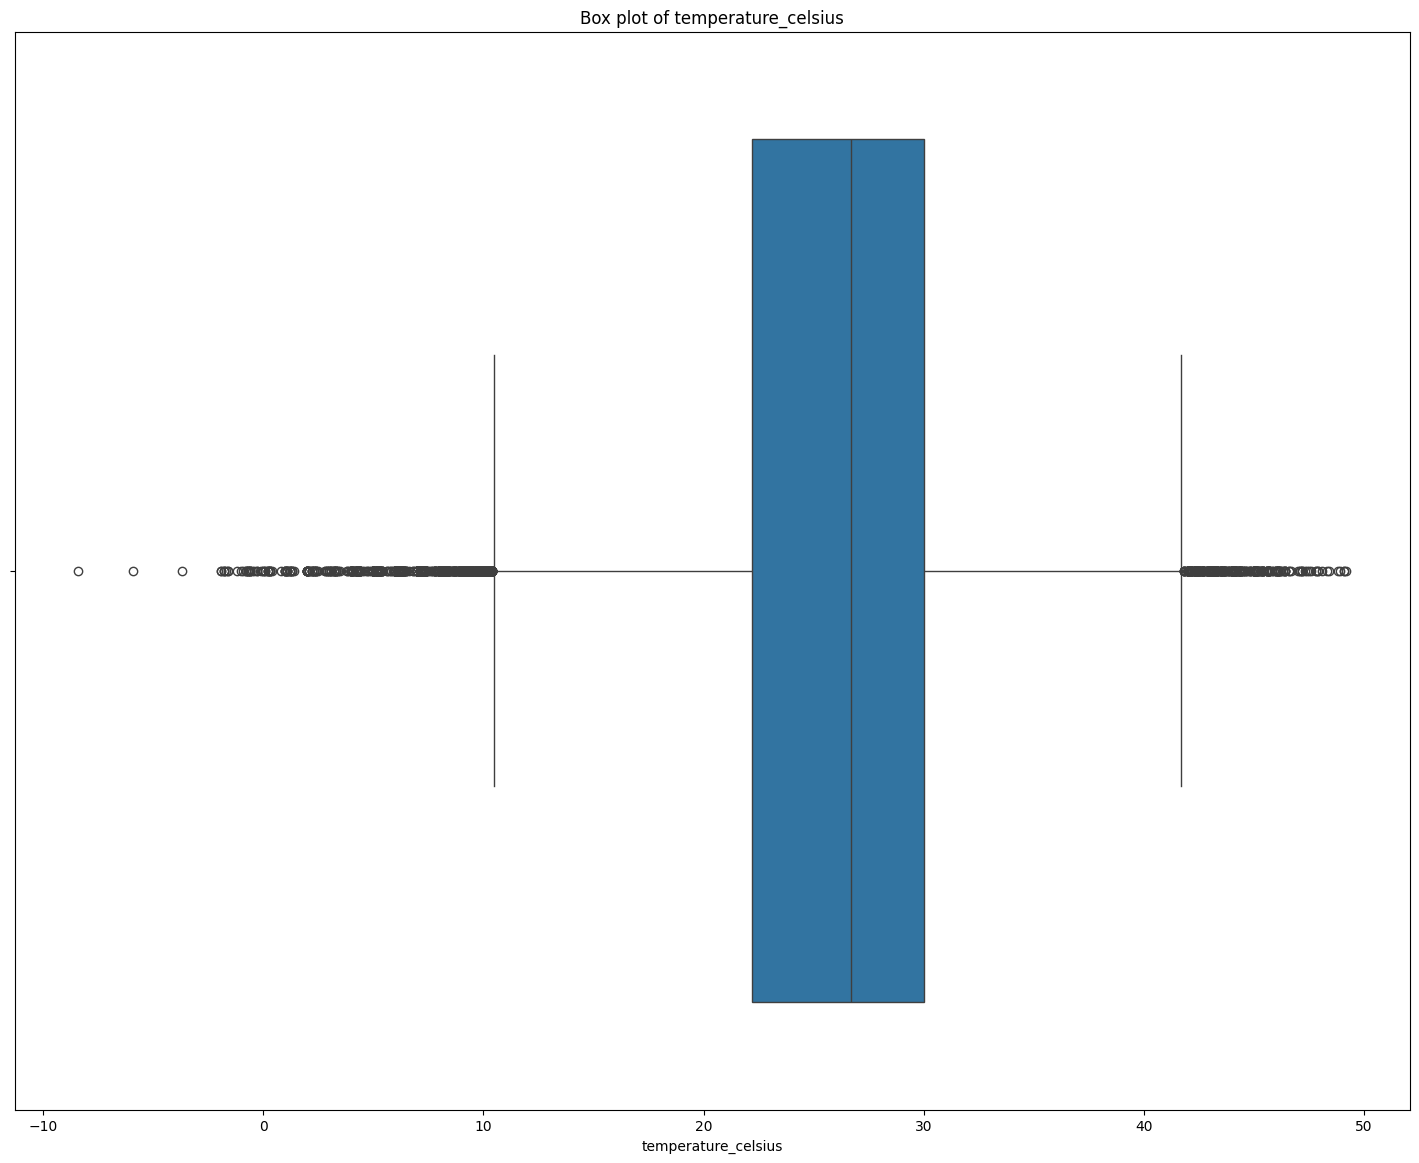

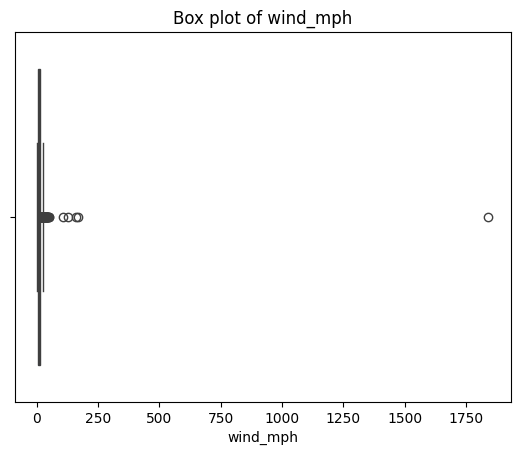

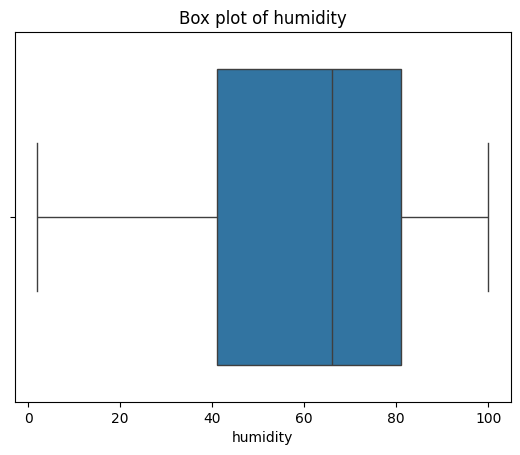

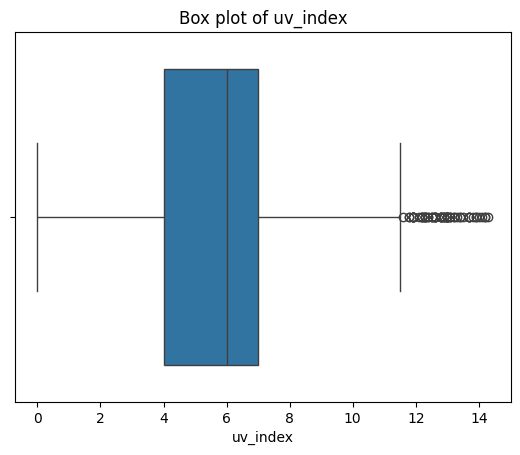

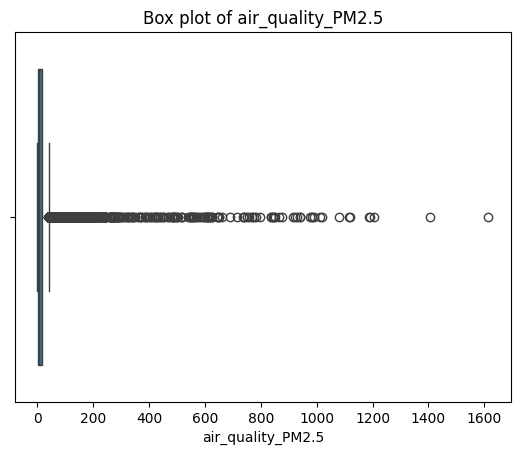

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#list of columns to plot
columns_to_plot = ['temperature_celsius', 'wind_mph', 'humidity', 'uv_index', 'air_quality_PM2.5']

# Set up the figure
plt.figure(figsize=(18, 14))

# Loop through each column and create a box plot
for column in columns_to_plot:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()  # Show the plot for each column


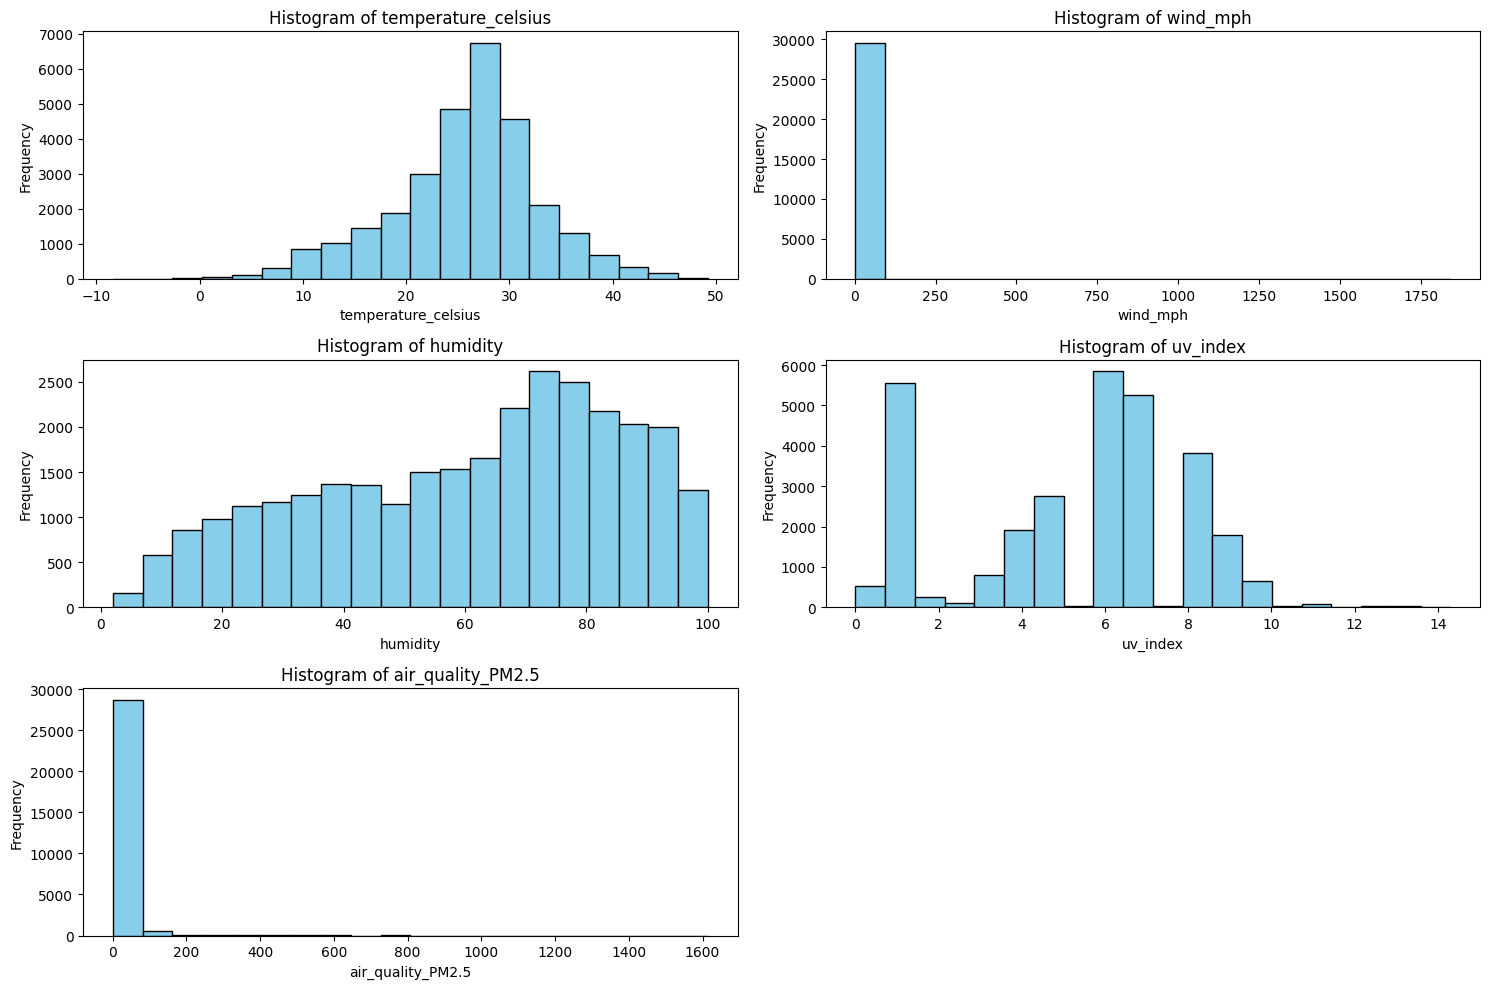

In [ ]:
# Histograms for numerical columns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(15, 10))

# Loop through each numerical column and create a histogram
for i, column in enumerate(['temperature_celsius', 'wind_mph', 'humidity', 'uv_index', 'air_quality_PM2.5'], 1):
    plt.subplot(3, 2, i)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


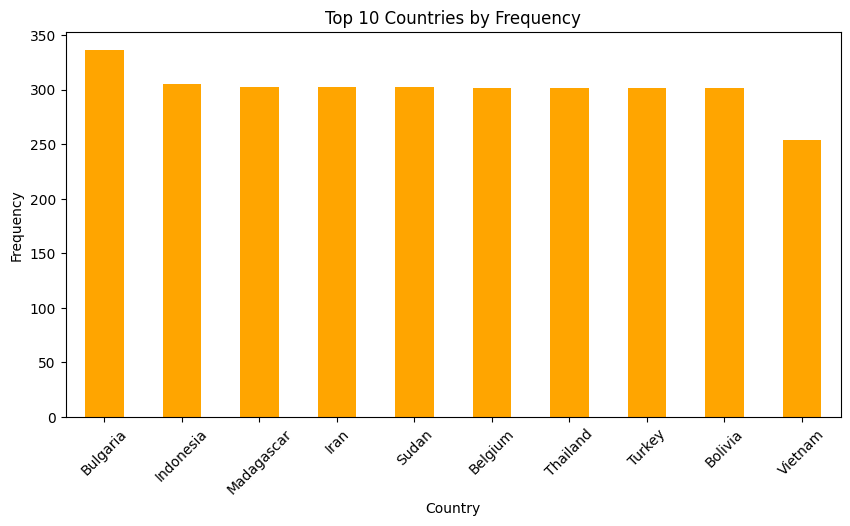

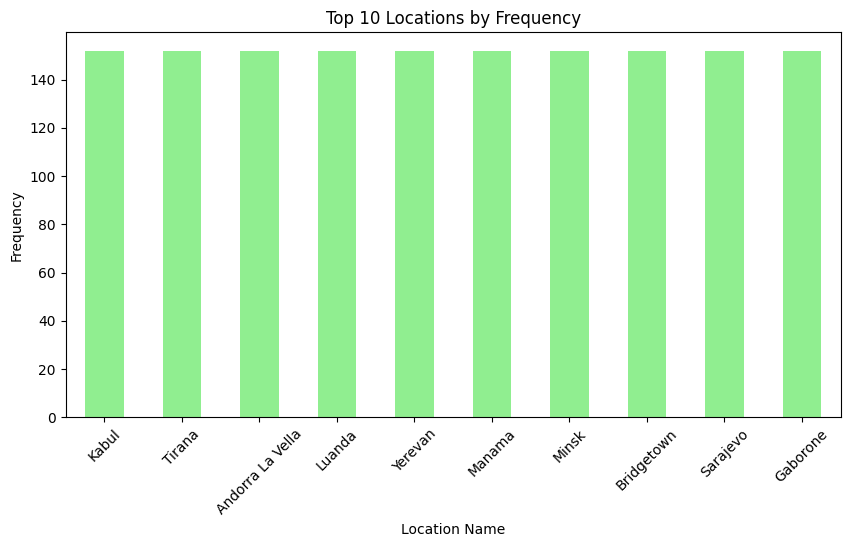

In [ ]:
# Bar plot for top 10 countries
plt.figure(figsize=(10, 5))
country_counts = df['country'].value_counts()
country_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Bar plot for top 10 locations
plt.figure(figsize=(10, 5))
location_counts = df['location_name'].value_counts()
location_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Locations by Frequency')
plt.xlabel('Location Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


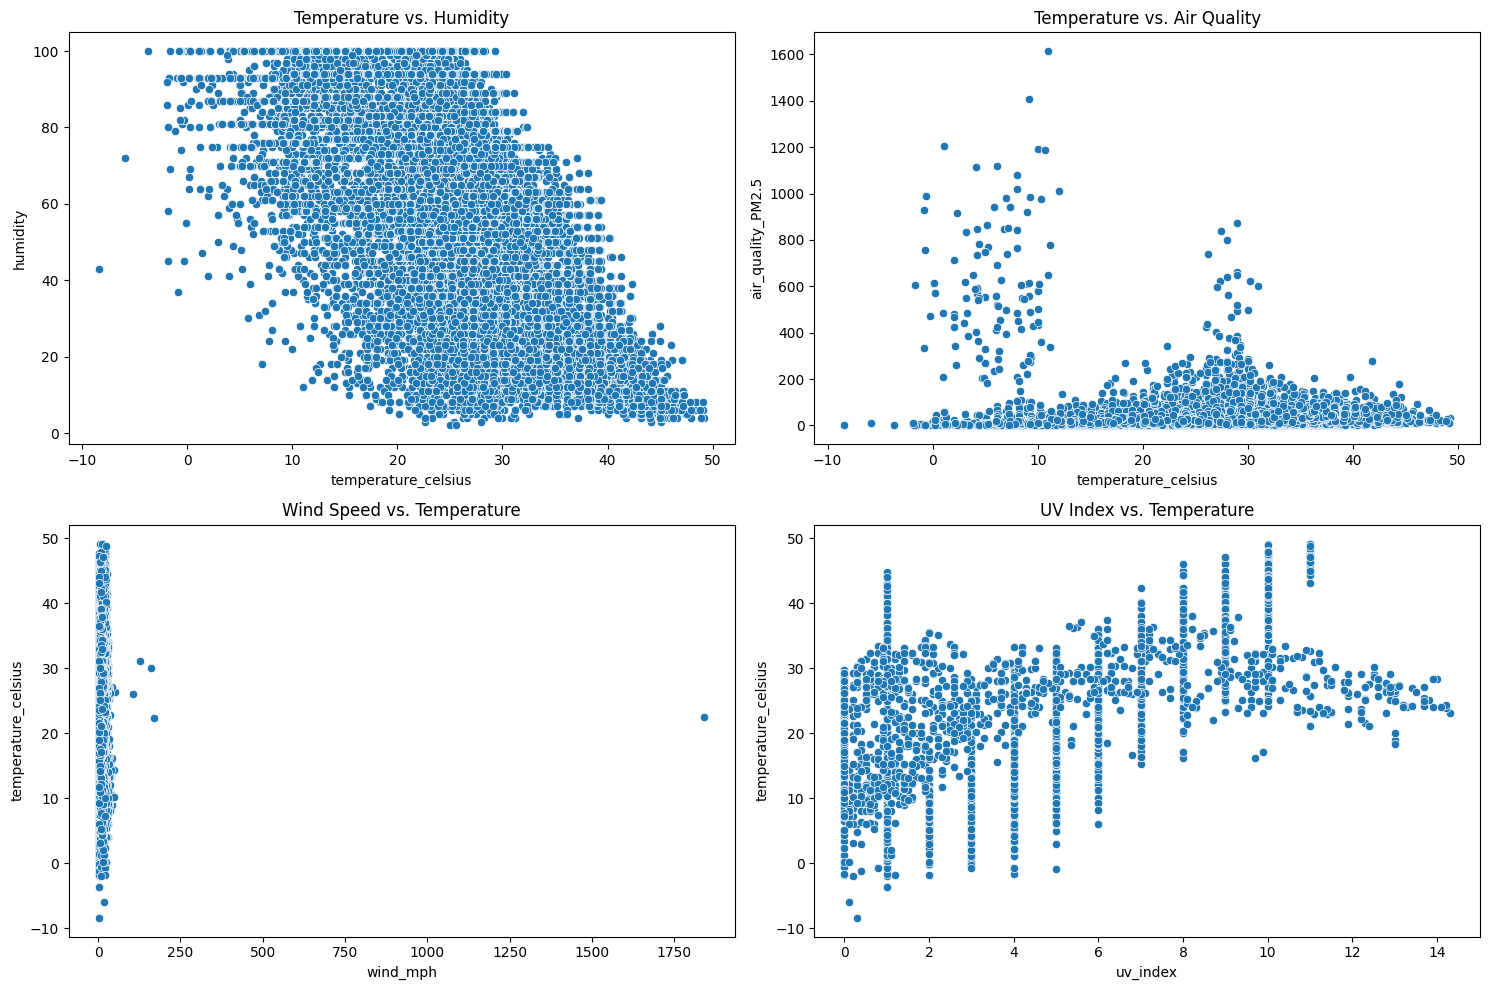

In [ ]:
# Scatter plots for key relationships
plt.figure(figsize=(15, 10))

# Temperature vs. Humidity
plt.subplot(2, 2, 1)
sns.scatterplot(x='temperature_celsius', y='humidity', data=df)
plt.title('Temperature vs. Humidity')

# Temperature vs. Air Quality
plt.subplot(2, 2, 2)
sns.scatterplot(x='temperature_celsius', y='air_quality_PM2.5', data=df)
plt.title('Temperature vs. Air Quality')

# Wind Speed vs. Temperature
plt.subplot(2, 2, 3)
sns.scatterplot(x='wind_mph', y='temperature_celsius', data=df)
plt.title('Wind Speed vs. Temperature')

# UV Index vs. Temperature
plt.subplot(2, 2, 4)
sns.scatterplot(x='uv_index', y='temperature_celsius', data=df)
plt.title('UV Index vs. Temperature')

plt.tight_layout()
plt.show()


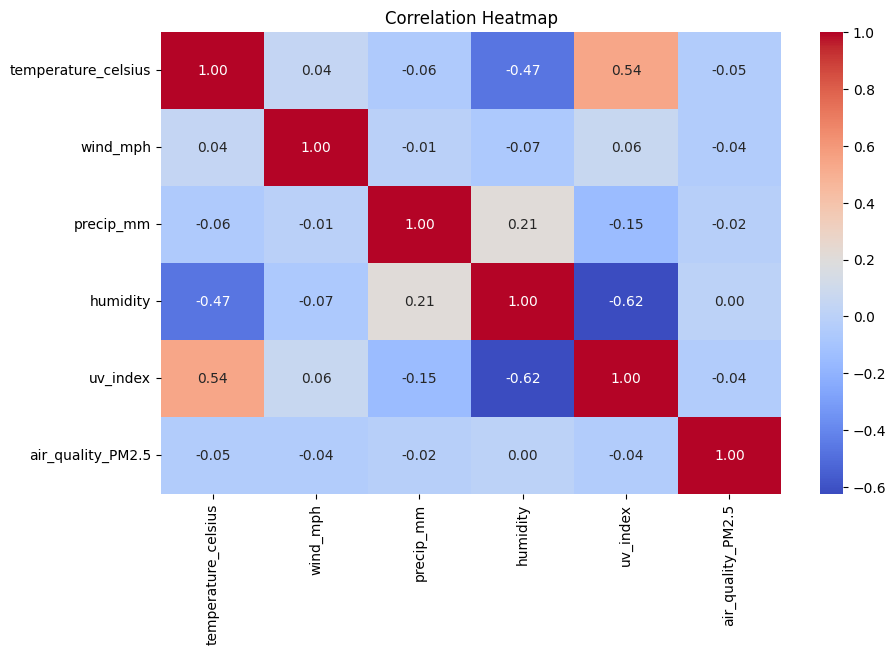

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap using the numerical DataFrame
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_df.corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create heatmap
plt.title('Correlation Heatmap')
plt.show()


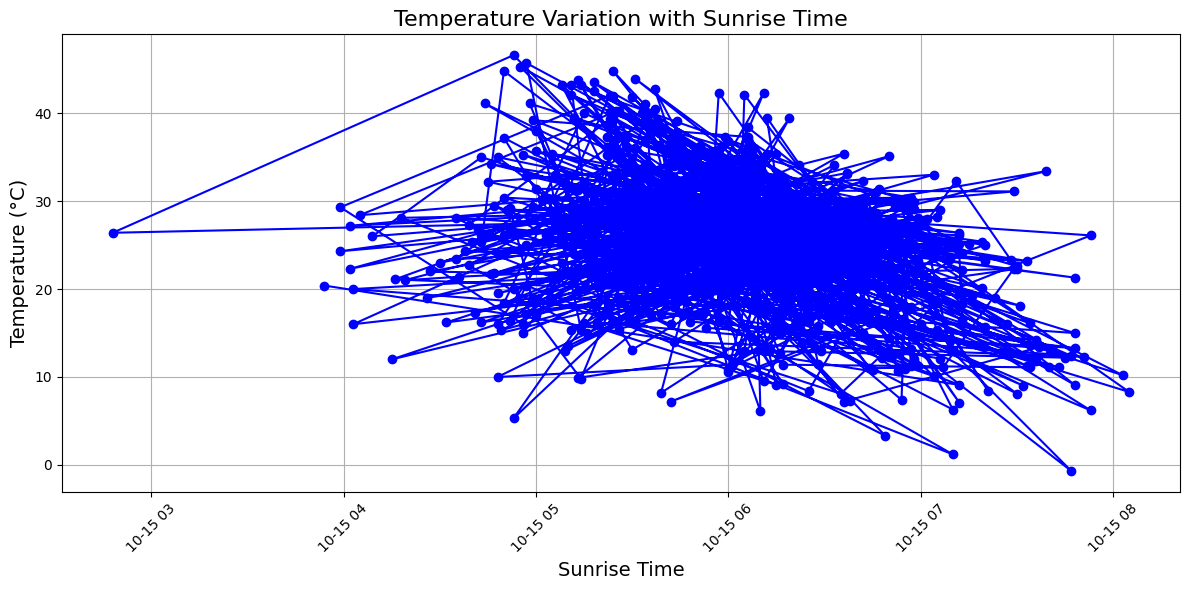

In [ ]:
# Convert sunrise time to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'])

# Sample the data to make it more manageable (optional)
sample_df = df.sample(n=1000)  # Use 1000 random samples

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(sample_df['sunrise'], sample_df['temperature_celsius'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Temperature Variation with Sunrise Time', fontsize=16)
plt.xlabel('Sunrise Time', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)  # Add grid for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics
summary_stats = numerical_df.describe()
print(summary_stats)


       temperature_celsius      wind_mph     precip_mm      humidity  \
count         29510.000000  29510.000000  29510.000000  29510.000000   
mean             25.816331      8.580985      0.161145     60.893528   
std               7.146221     11.925856      0.651319     25.066952   
min              -8.400000      2.200000      0.000000      2.000000   
25%              22.200000      4.300000      0.000000     41.000000   
50%              26.700000      7.800000      0.000000     66.000000   
75%              30.000000     11.900000      0.040000     81.000000   
max              49.200000   1841.200000     27.820000    100.000000   

           uv_index  air_quality_PM2.5  
count  29510.000000       29510.000000  
mean       5.349522          17.747288  
std        2.731876          48.760254  
min        0.000000           0.500000  
25%        4.000000           2.800000  
50%        6.000000           7.600000  
75%        7.000000          18.100000  
max       14.300000    